## Análise de dados - ENEM alunos.

#### Instalação e carregamento de bibliotecas

In [ ]:
!pip3 install pandas matplotlib numpy seaborn

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 'Set' para aparecer várias colunas e linhas.

In [6]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', None)

#### Irei tirar os dados do enem através desse link: https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem . Peguei o ano de 2021. Baixei a planilha e irei abrir no python.

In [ ]:
df = pd.read_csv('MICRODADOS_ENEM_2021.csv', sep=";",encoding="ISO-8859-1")

#### Com esse comando podemos ver o tamanho das linhas e colunas da base.

In [ ]:
df.shape

(3389832, 76)

#### Com esse lemos as cinco primeiras linhas.

In [ ]:
df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3144805,Nova Lima,31,MG,0,1,1,0,NaN,881.0,892.0,NaN,NaN,574.6,472.6,NaN,NaN,BBCCECEABCEABADDAAEECBEBADADAAABABBABBACCCBBB,99999BADDEAEBACADADDAEABCEECDDBBAEADEDEABADBBA...,NaN,1,NaN,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,NaN,1.0,140.0,120.0,120.0,180.0,200.0,760.0,F,F,B,B,3.0,D,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2704302,Maceió,27,AL,1,1,1,1,912.0,882.0,891.0,901.0,505.9,551.8,498.3,461.5,DCBCCBDBCCCCCCDDCDCCCACCABCCECCCCAADCCCBBCADE,ECCDAAEBCDACBDBDECABBEAACBCBCCCDACEABEBEBACAE,99999ACECCEEBACDABACBECBBCDBDEBDDCCCDECCDDCCCC...,CDCCBCCCDCCCCBEACEECAEABECCCDCBBCABACDAEDCCEC,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,120.0,120.0,120.0,80.0,560.0,B,B,B,B,3.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3515707,Ferraz de Vasconcelos,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,C,B,3.0,C,A,B,B,A,A,B,B,A,A,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,1.0,0,2304202.0,Crato,23.0,CE,2.0,1.0,1.0,2304202,Crato,23,CE,1,1,1,1,911.0,880.0,890.0,902.0,580.7,678.9,638.9,659.5,CCABBDAEDBEBEDDCAAABBDAADBDCACACEDAABCEABAEBC,CBBDABAABBAAEECEBAADADBEBCAEEBEDDEBBBADBCBEDC,ABBCA99999CDECCCBADCDBCEAEBBAAEADEEADDACAEDDAB...,EACDCEACDDDDCBDDCABADAEBACDCDDEDBBCDBECACCCCA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,180.0,120.0,200.0,160.0,780.0,B,B,B,B,6.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,1.0,0,2311603.0,Redenção,23.0,CE,2.0,1.0,1.0,2300150,Acarape,23,CE,1,1,1,1,912.0,882.0,891.0,901.0,497.7,532.4,457.6,582.6,BABCDCCBEBCD.DEDCABCBDEDAABEDADBDBCDECCAEDBCB,CAE.ACDCAAEBBEDEBCADADEDADAACEBDABBCEABBCDEAC,99999EAACBDCBECCABADBEDADCDADDCDDECABAADEBBDAC...,ACEDEBECABDABDEECBDEEADDDDBEBCEADCCADCADEDCEB,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,140.0,160.0,180.0,180.0,780.0,D,E,F,D,4.0,C,A,B,C,A,A,B,A,B,A,B,A,A,B,A,B,E,A,B,B


#### Aqui faço um filtro para selecionar somente as provas feitas na BA, pretendo diminuir o tamanho do banco de dados para facilitar os trabalhos.

In [ ]:
df.query('SG_UF_PROVA == "BA"')

#### Salvo o arquivo em uma nova variável.

In [ ]:
dfba = df.query('SG_UF_PROVA == "BA"')
dfba.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
9,210051128744,2021,4,F,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927200,Ruy Barbosa,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,507.6,539.2,494.6,413.3,BAEDEBDECCEAEDDCBDEDAEECEEEDBDECBDCECBCCDABED,EEEBAABCBCDBEAEBEACEDDEDECACBDBCDACECDAECBCBD,99999ACAEEEEBDEACDACDEABCEABBDEDBAEEBDEEACDBAC...,BACEACDACBAAAEDCECABBACDCDBBA.CEABCDADADBECBE,1,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,80.0,120.0,80.0,80.0,20.0,380.0,D,D,D,B,2.0,B,A,B,B,A,A,B,B,C,A,B,A,B,C,B,A,C,A,A,B
14,210054173438,2021,5,F,1,2,1,2,0,2,1.0,0,2927408.0,Salvador,29.0,BA,1.0,1.0,1.0,2927408,Salvador,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G,E,E,C,1.0,B,A,B,C,A,A,B,B,B,A,B,A,B,C,A,B,B,B,B,B
21,210052118573,2021,3,F,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2903201,Barreiras,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,439.6,437.7,455.9,446.2,BCEDEACAEDCEDCBDDCCAADABADDEBEECBACDCCABBDCCA,AAEADCDCAAADCBBBAABBEAEDABCDAACDDCBDAAABAABBB,EDBEC99999DDAAEBBDCDBBAABDECAADAEACCDABCEABABE...,EBBEBDCCDDCDCBADABBBCCEABDADCBCCACBDACDCDADCE,0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,80.0,120.0,80.0,100.0,80.0,460.0,B,F,B,D,3.0,G,A,B,C,B,A,B,A,B,B,B,A,B,B,A,B,B,A,B,B
27,210052350230,2021,10,F,1,2,1,1,8,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2928802,Santo Estêvão,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,548.1,619.5,676.3,386.6,CCAECCADEAADDEDDEECEDDEADDDCACDEDCDCDEADBEDDE,DBBEADDCABABCECEAEBEAEDCBCAEABEEDEBBEAABCBDCD,ABCCA99999DDCACDCACABBEAAEBDAEEBDEEAADACEEDDDB...,CAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,120.0,100.0,120.0,120.0,580.0,H,E,F,D,3.0,B,A,B,C,A,B,B,B,A,A,B,A,B,B,B,A,D,A,A,B
32,210053156861,2021,9,M,1,2,1,1,5,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2910800,Feira de Santana,29,BA,1,1,1,1,1014.0,1000.0,1004.0,1010.0,465.2,613.1,522.1,579.6,CDCCBDBBDCBACEBDACBCACADBCBECCEBCDDEBDACEECCD,CCBAADECCBACBECCBEADAEBEACBEBBEADEBBABDACDEBC,BADCE99999DABAABBABBBCEDBDCDABEABCBBDCACBABAAA...,CCBACBBCCCCEDDDDCBCCDCACCCBBBDDDBCBADDBCABACA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,100.0,120.0,100.0,120.0,100.0,540.0,F,E,C,C,4.0,C,A,B,C,A,B,B,A,A,A,A,A,A,B,A,A,D,A,B,B


#### Veja como diminuiu o tamanho do banco de dados.

In [ ]:
dfba.shape

(266194, 76)

#### Aqui podemos verificar se todas as colunas atendem às características importantes de forma resumida, como dados de entrada, valores faltantes e o tipo de objeto. Até agora, não identifiquei nenhum problema em relação ao tipo de arquivo ou variável, mas percebi que algumas colunas possuem dados faltantes. Pode haver vários motivos para isso, como o aluno ter ficado ausente no dia da prova ou não ter marcado uma opção, entre outros. Uma outra característica a se observar é o Dtype, para podermos garantir que a variável da coluna está no formato adequado, por exemplo ter uma variável numerica numa string.

In [ ]:
dfba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266194 entries, 0 to 266193
Data columns (total 76 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   NU_INSCRICAO            266194 non-null  int64  
 1   NU_ANO                  266194 non-null  int64  
 2   TP_FAIXA_ETARIA         266194 non-null  int64  
 3   TP_SEXO                 266194 non-null  object 
 4   TP_ESTADO_CIVIL         266194 non-null  int64  
 5   TP_COR_RACA             266194 non-null  int64  
 6   TP_NACIONALIDADE        266194 non-null  int64  
 7   TP_ST_CONCLUSAO         266194 non-null  int64  
 8   TP_ANO_CONCLUIU         266194 non-null  int64  
 9   TP_ESCOLA               266194 non-null  int64  
 10  TP_ENSINO               84388 non-null   float64
 11  IN_TREINEIRO            266194 non-null  int64  
 12  CO_MUNICIPIO_ESC        47820 non-null   float64
 13  NO_MUNICIPIO_ESC        47820 non-null   object 
 14  CO_UF_ESC           

#### Foi necessário resetar o index. O drop=True permite que eu apague o indice anterior.

In [ ]:
dfba=dfba.reset_index(drop=True)
dfba.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210051128744,2021,4,F,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927200,Ruy Barbosa,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,507.6,539.2,494.6,413.3,BAEDEBDECCEAEDDCBDEDAEECEEEDBDECBDCECBCCDABED,EEEBAABCBCDBEAEBEACEDDEDECACBDBCDACECDAECBCBD,99999ACAEEEEBDEACDACDEABCEABBDEDBAEEBDEEACDBAC...,BACEACDACBAAAEDCECABBACDCDBBA.CEABCDADADBECBE,1,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,80.0,120.0,80.0,80.0,20.0,380.0,D,D,D,B,2.0,B,A,B,B,A,A,B,B,C,A,B,A,B,C,B,A,C,A,A,B
1,210054173438,2021,5,F,1,2,1,2,0,2,1.0,0,2927408.0,Salvador,29.0,BA,1.0,1.0,1.0,2927408,Salvador,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G,E,E,C,1.0,B,A,B,C,A,A,B,B,B,A,B,A,B,C,A,B,B,B,B,B
2,210052118573,2021,3,F,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2903201,Barreiras,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,439.6,437.7,455.9,446.2,BCEDEACAEDCEDCBDDCCAADABADDEBEECBACDCCABBDCCA,AAEADCDCAAADCBBBAABBEAEDABCDAACDDCBDAAABAABBB,EDBEC99999DDAAEBBDCDBBAABDECAADAEACCDABCEABABE...,EBBEBDCCDDCDCBADABBBCCEABDADCBCCACBDACDCDADCE,0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,80.0,120.0,80.0,100.0,80.0,460.0,B,F,B,D,3.0,G,A,B,C,B,A,B,A,B,B,B,A,B,B,A,B,B,A,B,B
3,210052350230,2021,10,F,1,2,1,1,8,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2928802,Santo Estêvão,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,548.1,619.5,676.3,386.6,CCAECCADEAADDEDDEECEDDEADDDCACDEDCDCDEADBEDDE,DBBEADDCABABCECEAEBEAEDCBCAEABEEDEBBEAABCBDCD,ABCCA99999DDCACDCACABBEAAEBDAEEBDEEAADACEEDDDB...,CAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,120.0,100.0,120.0,120.0,580.0,H,E,F,D,3.0,B,A,B,C,A,B,B,B,A,A,B,A,B,B,B,A,D,A,A,B
4,210053156861,2021,9,M,1,2,1,1,5,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2910800,Feira de Santana,29,BA,1,1,1,1,1014.0,1000.0,1004.0,1010.0,465.2,613.1,522.1,579.6,CDCCBDBBDCBACEBDACBCACADBCBECCEBCDDEBDACEECCD,CCBAADECCBACBECCBEADAEBEACBEBBEADEBBABDACDEBC,BADCE99999DABAABBABBBCEDBDCDABEABCBBDCACBABAAA...,CCBACBBCCCCEDDDDCBCCDCACCCBBBDDDBCBADDBCABACA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,100.0,120.0,100.0,120.0,100.0,540.0,F,E,C,C,4.0,C,A,B,C,A,B,B,A,A,A,A,A,A,B,A,A,D,A,B,B


#### Irei salvar esse dataframe num arquivo .csv .

In [18]:
dfba.to_csv("dados_enem_2021_BA.csv")

#### E para posteriores aberturas podemos abrir a base de dados salva na pasta e também no drive.

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
dfba = pd.read_csv('dados_enem_2021_BA.csv')

#### Após feita essas pequenas alterações e ver do que se trata os dados, podemos tentar levantar algumas hípoteses aos dados (Análise Exploratória).

* Padrões espaciais afetam o desempenho?

* Renda familiar afeta os desempenho escolar?

* Há diferença de desempenho entre escolas privadas e públicas?

* Diferença de idade afeta a nota?

* Qual matéria tem maior nota em determinada região? 

#### E podemos saber quais informações possui os dados:

* Dados dos participantes.

* Dados da escola.

* Dados do local da prova.

* Dados da prova objetiva.

* Dados da redação.

* Questionário sócioeconômico.

#### Algumas dessas informações nós conseguimos através do dicionário de dados do ENEM, que estarei disponibilizando no repositório da pasta.

#### Continuando a verificação, podemos ver os dados nulos em termos percentuais. Aqui utilizaremos um fatiamento no shape e uma ordenação em ordem decrescente.

In [ ]:
(dfba.isna().sum() / dfba.shape[0]*100).sort_values(ascending = False)

CO_MUNICIPIO_ESC          82.035658
TP_DEPENDENCIA_ADM_ESC    82.035658
CO_UF_ESC                 82.035658
NO_MUNICIPIO_ESC          82.035658
TP_LOCALIZACAO_ESC        82.035658
TP_SIT_FUNC_ESC           82.035658
SG_UF_ESC                 82.035658
TP_ENSINO                 68.298309
NU_NOTA_MT                34.124736
TX_GABARITO_MT            34.124736
TX_GABARITO_CN            34.124736
TX_RESPOSTAS_MT           34.124736
NU_NOTA_CN                34.124736
CO_PROVA_CN               34.124736
CO_PROVA_MT               34.124736
TX_RESPOSTAS_CN           34.124736
NU_NOTA_LC                30.560418
NU_NOTA_CH                30.560418
CO_PROVA_LC               30.560418
TX_RESPOSTAS_CH           30.560418
TX_RESPOSTAS_LC           30.560418
TX_GABARITO_CH            30.560418
TX_GABARITO_LC            30.560418
TP_STATUS_REDACAO         30.560418
NU_NOTA_COMP1             30.560418
NU_NOTA_COMP2             30.560418
NU_NOTA_COMP3             30.560418
NU_NOTA_COMP4             30

#### Aqui iremos tirar as principais medidas estatísticas para descrever os dados.

#### Tirei notação científica para tornar os dados mais legível e fiz a transposta para facilitar a visualização dos dados.

#### Com essa informação é possível ver discrepâncias entre os valores e achar inconsistências nos dados.

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
dfba.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,266194.00,133096.50,76843.73,0.00,66548.25,133096.50,199644.75,266193.00
level_0,266194.00,133096.50,76843.73,0.00,66548.25,133096.50,199644.75,266193.00
index,266194.00,1697664.66,1003326.41,9.00,809979.75,1680632.50,2580411.25,3389821.00
NU_INSCRICAO,266194.00,210052726549.63,981957.69,210051014333.00,210051874786.00,210052741349.50,210053607621.50,210054465467.00
NU_ANO,266194.00,2021.00,0.00,2021.00,2021.00,2021.00,2021.00,2021.00
TP_FAIXA_ETARIA,266194.00,5.71,3.88,1.00,3.00,4.00,8.00,20.00
TP_ESTADO_CIVIL,266194.00,1.05,0.41,0.00,1.00,1.00,1.00,4.00
TP_COR_RACA,266194.00,2.30,0.91,0.00,2.00,3.00,3.00,5.00
TP_NACIONALIDADE,266194.00,1.03,0.19,0.00,1.00,1.00,1.00,4.00
TP_ST_CONCLUSAO,266194.00,1.60,0.72,1.00,1.00,1.00,2.00,4.00


#### Podemos selecionar valores únicos de cada variável, algumas delas se encontram únicas, por exemplo de ano, pois o banco de dados é somente relacionado a um ano de prova do ENEM, ou outras que possuem variáveis dummies.

In [ ]:
dfba.nunique().sort_values()

SG_UF_PROVA                    1
CO_UF_PROVA                    1
NU_ANO                         1
Q025                           2
Q020                           2
TP_LINGUA                      2
TP_LOCALIZACAO_ESC             2
IN_TREINEIRO                   2
TP_ENSINO                      2
Q018                           2
Q023                           2
Q021                           2
TP_SEXO                        2
TP_ESCOLA                      3
TP_PRESENCA_MT                 3
TP_PRESENCA_LC                 3
TP_PRESENCA_CH                 3
TP_PRESENCA_CN                 3
TP_ST_CONCLUSAO                4
Q007                           4
TP_SIT_FUNC_ESC                4
TP_DEPENDENCIA_ADM_ESC         4
Q013                           5
Q008                           5
Q016                           5
Q009                           5
Q017                           5
Q024                           5
Q011                           5
Q015                           5
Q014      

#### Podemos fazer uma contagem dos alunos e seus tipos de escolas. Onde:

1. Não respondeu
2. Pública
3. Privada

In [ ]:
dfba.TP_ESCOLA.value_counts()

1    177170
2     76984
3     12040
Name: TP_ESCOLA, dtype: int64

#### Existe uma proporção muito maior de alunos do ensino público em relação ao privado.

(array([0, 1, 2]),
 [Text(0, 0, 'Não respondeu'), Text(1, 0, 'Pública'), Text(2, 0, 'Privada')])

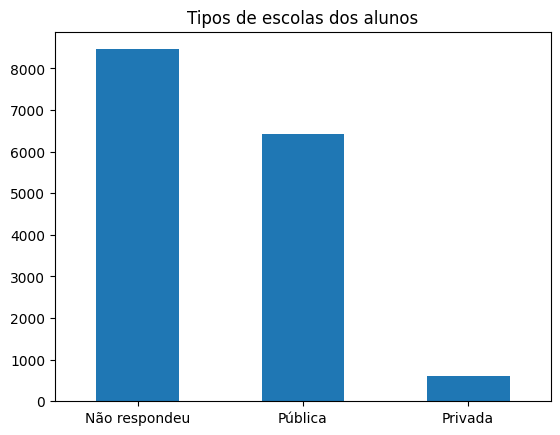

In [83]:
dfba.TP_ESCOLA.map({1:'Não respondeu', 2: 'Pública', 3: 'Privada'})\
    .value_counts().plot(kind="bar")
plt.title("Tipos de escolas dos alunos")
plt.xticks(rotation=0)

(array([], dtype=float64), [])

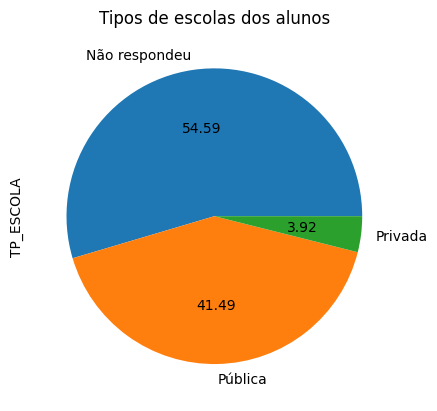

In [85]:
dfba.TP_ESCOLA.map({1:'Não respondeu', 2: 'Pública', 3: 'Privada'})\
    .value_counts().plot(kind="pie",autopct='%.2f')
plt.title("Tipos de escolas dos alunos")
plt.xticks(rotation=0)

#### Uma quantidade muito maior de mulheres fazendo as provas do ENEM. Isso é possível por conta de algumas políticas públicas podem incentivar mais a participação de mulheres na educação, como programas de bolsas de estudo específicas para mulheres, ações afirmativas ou políticas de igualdade de gênero. Isso pode resultar em uma maior proporção de mulheres fazendo a prova do ENEM em comparação aos homens ou percepções e expectativas sociais relacionadas a estereótipos de gênero também podem influenciar a participação no ENEM. Por exemplo, em algumas culturas ou regiões, pode haver pressões ou expectativas diferentes para homens e mulheres em relação à educação, carreira e outros aspectos da vida, o que pode afetar a participação em exames como o ENEM.

(array([0, 1]), [Text(0, 0, 'F'), Text(1, 0, 'M')])

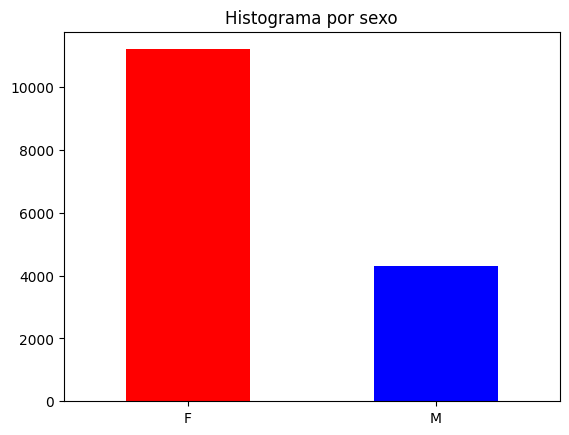

In [54]:
cores = ['red', 'blue']
dfba.TP_SEXO.value_counts().plot(kind="bar",color=cores)
plt.title("Histograma por sexo")
plt.xticks(rotation=0)


#### Podemos selecionar várias colunas.

In [66]:
pd.reset_option('display.max_rows') #Resetar a apresentação das linhas para carregar mais rápido.

In [ ]:
dfba[["TP_SEXO", "TP_ESCOLA"]]

,TP_SEXO,TP_ESCOLA
0,F,2
1,F,2
2,F,2
3,F,1
4,M,1
...,...,...
266189,M,1
266190,M,1
266191,M,1
266192,M,1


In [ ]:
dfba[["TP_SEXO", "TP_ESCOLA"]].value_counts()

TP_SEXO  TP_ESCOLA
F        1            114715
M        1             62455
F        2             50561
M        2             26423
F        3              6721
M        3              5319
dtype: int64

#### Se preferirmos fatiar os dados para uma indexação específica. Fazemos assim:

In [ ]:
dfba.iloc[0:10, 3]

0    210051128744
1    210054173438
2    210052118573
3    210052350230
4    210053156861
5    210053085526
6    210053741476
7    210053790986
8    210051521447
9    210054171092
Name: NU_INSCRICAO, dtype: int64

#### Com o 'select_dtypes' selecionamos os tipos dados que queremos apresentar, por exemplo separar variáveis categóricas ou qualitativas.

In [ ]:
dfba.select_dtypes(include = [int,float])

,Unnamed: 0,level_0,index,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
0,0,0,9,210051128744,2021,4,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,2927200,29,1,1,1,1,909.0,881.0,892.0,899.0,507.6,539.2,494.6,413.3,1,1.0,80.0,120.0,80.0,80.0,20.0,380.0,2.0
1,1,1,14,210054173438,2021,5,1,2,1,2,0,2,1.0,0,2927408.0,29.0,1.0,1.0,1.0,2927408,29,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,2,2,21,210052118573,2021,3,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,2903201,29,1,1,1,1,912.0,882.0,891.0,901.0,439.6,437.7,455.9,446.2,0,1.0,80.0,120.0,80.0,100.0,80.0,460.0,3.0
3,3,3,27,210052350230,2021,10,1,2,1,1,8,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2928802,29,1,1,1,1,911.0,880.0,890.0,902.0,548.1,619.5,676.3,386.6,0,1.0,120.0,120.0,100.0,120.0,120.0,580.0,3.0
4,4,4,32,210053156861,2021,9,1,2,1,1,5,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2910800,29,1,1,1,1,1014.0,1000.0,1004.0,1010.0,465.2,613.1,522.1,579.6,0,1.0,100.0,120.0,100.0,120.0,100.0,540.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266189,266189,266189,3389785,210051432069,2021,12,1,3,1,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2900702,29,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
266190,266190,266190,3389796,210051106175,2021,14,2,2,1,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2918407,29,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
266191,266191,266191,3389806,210051995005,2021,11,0,2,1,1,12,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2927408,29,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
266192,266192,266192,3389818,210053234415,2021,12,2,2,1,1,15,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2927408,29,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


#### Vamos supor que você queira saber todas colunas qualitativas dos seus dados, então, podemos salvar essas colunas numa lista.

In [ ]:
col_quali = dfba.select_dtypes(include = object).columns.tolist()
col_quali

['TP_SEXO',
 'NO_MUNICIPIO_ESC',
 'SG_UF_ESC',
 'NO_MUNICIPIO_PROVA',
 'SG_UF_PROVA',
 'TX_RESPOSTAS_CN',
 'TX_RESPOSTAS_CH',
 'TX_RESPOSTAS_LC',
 'TX_RESPOSTAS_MT',
 'TX_GABARITO_CN',
 'TX_GABARITO_CH',
 'TX_GABARITO_LC',
 'TX_GABARITO_MT',
 'Q001',
 'Q002',
 'Q003',
 'Q004',
 'Q006',
 'Q007',
 'Q008',
 'Q009',
 'Q010',
 'Q011',
 'Q012',
 'Q013',
 'Q014',
 'Q015',
 'Q016',
 'Q017',
 'Q018',
 'Q019',
 'Q020',
 'Q021',
 'Q022',
 'Q023',
 'Q024',
 'Q025']

#### Tentando responder a pergunta "Há diferença de desempenho entre escolas privadas e públicas?" Podemos comparar as  médias. Lembrando:

1. Não respondeu
2. Pública
3. Privada

In [ ]:
dfba.query('TP_ESCOLA == 2').NU_NOTA_MT.agg([np.mean, np.median]) #Pública

mean      487.37505
median    468.90000
Name: NU_NOTA_MT, dtype: float64

In [ ]:
dfba.query('TP_ESCOLA == 3').NU_NOTA_MT.agg([np.mean, np.median]) #Privada

mean      579.8339
median    581.6000
Name: NU_NOTA_MT, dtype: float64

#### A diferença entre a escola privada para a pública pode ser influenciada por diversos fatores: 
* Contexto socioeconômico: Escolas públicas e privadas muitas vezes estão localizadas em regiões diferentes e atendem a populações com diferentes níveis socioeconômicos. Escolas privadas tendem a estar concentradas em áreas urbanas e atender a alunos de famílias com maior poder aquisitivo, enquanto escolas públicas podem estar localizadas em áreas rurais ou urbanas e atender a alunos de famílias com menor poder aquisitivo. Essas diferenças socioeconômicas podem influenciar a média das notas no ENEM. 
* Recursos educacionais: Escolas privadas, em geral, têm mais recursos financeiros e infraestrutura educacional em comparação com escolas públicas. Isso pode incluir bibliotecas, laboratórios, equipamentos e materiais didáticos mais atualizados, o que pode contribuir para um melhor preparo dos alunos para o ENEM.
* Qualificação dos professores: Escolas privadas geralmente exigem que seus professores tenham formação acadêmica mais avançada e experiência na área de ensino. Isso pode resultar em um corpo docente mais qualificado, capaz de oferecer um ensino de qualidade aos estudantes, o que pode se refletir em melhores resultados no ENEM.
* Currículo e metodologia de ensino: Escolas públicas e privadas podem adotar currículos e metodologias de ensino diferentes, o que pode ter impacto nas notas dos alunos no ENEM. Escolas privadas podem ter mais flexibilidade para adaptar o currículo e a metodologia de ensino às necessidades dos estudantes, enquanto escolas públicas estão sujeitas a diretrizes e regulamentações do sistema de ensino público.
* Preparação para o ENEM: Escolas privadas muitas vezes têm programas de preparação específicos para o ENEM, com treinamento para a realização das provas, revisão de conteúdos e simulados, o que pode contribuir para um melhor desempenho dos alunos na prova.

### Sobre a diferença da mediana para média é possível a presença de outliers. 

#### Também temos a possibilidade de adicionar condições mais restritivas. Selecionamos 5 garotos aleatórios e também ser treineiro.

In [ ]:
dfba.query("(TP_SEXO == 'M') & (IN_TREINEIRO == 1)").sample(5)

,Unnamed: 0,level_0,index,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
218829,218829,218829,2834305,210054027519,2021,1,M,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,598.9,686.3,640.3,823.8,CCCBBCABABAEEBBAECBCBCEADDDDACBAACBBBCDEBEEBB,DBBAAEABBBABEECEBAAEADBEACCEADEEDEBBBCABABADC,BBBCA99999CDEACBCAACBBEADEBBABEADEEBDCACEDDDAA...,ECCCEBBABDDDCEDDCCBAEBEBABBDCEDCCAEDEDBCCECDA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,160.0,40.0,40.0,200.0,40.0,480.0,E,G,D,D,2.0,G,A,B,C,B,A,B,A,B,B,B,A,B,B,B,A,C,A,B,B
98281,98281,98281,1240609,210053359996,2021,1,M,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2914000,Ipirá,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,508.3,388.6,435.2,414.1,DCCCDBEBDBDBCDABDDCACDCCDCBBACCCBDAECBCCC*DCE,CCBDCDDCCDDADBBBCDBBEACCDBDCBBCCBBADDAEBDCDDE,99999ACABDDBCCBEBCEABCABCBEBDCADCCDDBCDCABBBCC...,CDCBDDDBCDDCC*ACBCDADAACBCDBBCBAA*BCCDBCDBCBB,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,100.0,100.0,120.0,120.0,40.0,480.0,D,E,A,C,3.0,B,A,B,D,A,A,B,A,A,A,A,A,A,B,B,B,B,A,A,B
233697,233697,233697,3037255,210052032153,2021,3,M,1,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2910727,Eunápolis,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,571.8,592.4,581.8,634.5,ADABECACEECBCEDDADDBBBADCDCBBDBBECEDBCAECEEBE,AAECDABECECDABBAEACBBCEBCAEAADADEAABAABBAEBDB,CAAAE99999BDCDEADEEAADDADADBDEEDBCCACBBBBECDCC...,DDCEBCCCACEDAAADDBDABDBECBDCECADADDDCADBADEBE,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,4.0,0.0,0.0,0.0,0.0,0.0,0.0,H,E,F,F,5.0,F,A,D,E,A,A,C,B,B,A,C,A,A,C,A,B,E,B,D,B
62441,62441,62441,763998,210054026067,2021,7,M,1,2,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2909802,Cruz das Almas,29,BA,0,1,1,0,NaN,882.0,891.0,NaN,NaN,393.8,395.0,NaN,NaN,CCBECCDDAABCCDCCADCDCDECAEDECEDBDACBEDBDCBADC,AECAA99999ACDCDDEBBDCDEAEBDDCABEDADAEBDAEAEBAC...,NaN,0,NaN,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,NaN,1.0,80.0,120.0,100.0,80.0,0.0,380.0,C,D,A,A,3.0,B,A,B,C,A,B,B,A,A,A,B,A,A,B,A,A,C,A,A,B
178256,178256,178256,2289691,210053292276,2021,1,M,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,565.4,604.3,533.4,627.6,CCCDEBEEEEADBCCCCCBECEAABADABACDBCDABCABCEECB,DBABADBECDABEECCEAAAADAEACAEBBEEBEDECABBCBAAC,99999ACACACDAADDBACEBBEDBDABABEADEDBDCCCBDDACA...,CADCBDBAABDCCEDDCCDDDEEEBBCDDEECCDDBBDEBADCBB,1,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,180.0,120.0,120.0,120.0,660.0,E,F,D,E,4.0,O,A,C,D,C,A,B,B,B,A,B,A,A,B,A,A,E,A,A,B


#### Podemos usar o operador OR ou '|' sendo uma condição ser garoto ou ser treineiro.

In [ ]:
dfba.query("(TP_SEXO == 'M') | (IN_TREINEIRO == 1)").sample(5)

,Unnamed: 0,level_0,index,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
10740,10740,10740,117550,210053519733,2021,2,F,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927002,Rio Real,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,534.0,635.1,486.8,717.7,BADBABDCABCBCDECBADBBAEDABDAECCAEADBCCCBDABDE,BBECCAEBBAEBCACCABEACDABBBABBCBBAEABBAACCEBBA,ABAAE99999CDBCBDCDCDACACCBDCCBBDBDCDEDAECBEBCE...,EABEBACDACBECBBDEDCBAEBADBACBDBEEDDADCCABDCDB,0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,160.0,180.0,160.0,180.0,200.0,880.0,C,E,B,C,4.0,E,A,B,C,B,B,B,B,A,A,A,A,A,B,A,B,D,A,B,B
252316,252316,252316,3246612,210054019556,2021,14,M,2,2,1,1,15,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,D,F,B,3.0,B,A,B,C,A,A,B,A,B,A,A,A,A,B,A,A,C,A,A,B
201738,201738,201738,2606393,210052988808,2021,1,F,1,2,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,483.8,427.6,491.6,551.2,DABBBDEBEDCABDCDCBBABBACEDBDEEBCBDBBEBCCDCCAC,AABBECCCBADACACDBEAEADEDBDBCCBDCBAACBAAADDCBC,AEAAC99999DCBAEDBDACBCEACCDDDBDABDDADBAAECAEAA...,DBCAEDADCDBDCEBBDDBCAEACBDDDBDBBDEDACBCEABEBC,0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,100.0,180.0,100.0,120.0,160.0,660.0,D,E,D,B,3.0,B,A,B,C,A,A,B,A,B,A,A,A,A,B,A,A,C,A,B,B
49993,49993,49993,626756,210053262761,2021,6,M,1,3,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2918407,Juazeiro,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,535.6,538.8,438.6,600.3,BBBBBBDEADBBEACCCBCEDEBDEDBAEDDCACEDCDCEBAAEB,ABACDAAABAEBEADAAACEADEBEDADDEEAADDDAADCBAABD,BCCAD99999EDBDEBCECCBBDCDBDAADCBBEADADCDEADDAE...,CBCEAEDDCDCCCBBACBDAEBCEDBDEBBCADDBBDECACDBBA,0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,120.0,120.0,120.0,120.0,120.0,600.0,E,F,C,B,5.0,C,A,C,C,B,A,B,B,B,A,A,A,B,C,A,A,C,A,A,B
75257,75257,75257,925399,210053597650,2021,3,F,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2905701,Camaçari,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,386.9,376.2,455.4,431.7,CBDDEBCAACEEBCDAEBBCDACEDAECDADBACABDEBDA*DEA,DCBBEAEECBEDCEBBBCBDBEAAEBAABAAAEBDEBDCACBABD,AEECA99999CADAAEBACCDBBABDADBEDAEEBBBBAAEDBBBA...,BACDCBAEEAC.BDDCBDAACBBCDEDCEBEADBEACDBBECDBA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,100.0,100.0,80.0,80.0,480.0,E,H,F,F,2.0,A,A,B,C,A,A,B,B,A,A,B,A,A,B,B,A,C,A,B,B


#### Se quisermos fazer um filtro mais específico em um DataFrame pandas, podemos utilizar o método 'isin' para selecionar especificamente as linhas que queremos manter ou podemos utilizar o operador '~' para excluir as linhas que atendem ao critério de filtro.

In [ ]:
dfba[dfba.NO_MUNICIPIO_PROVA.isin(['Itabuna','Salvador'])] #Aqui só selecionamos os munícipios de Salvador e Itabuna.

,Unnamed: 0,level_0,index,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
1,1,1,14,210054173438,2021,5,F,1,2,1,2,0,2,1.0,0,2927408.0,Salvador,29.0,BA,1.0,1.0,1.0,2927408,Salvador,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G,E,E,C,1.0,B,A,B,C,A,A,B,B,B,A,B,A,B,C,A,B,B,B,B,B
6,6,6,39,210053741476,2021,6,F,1,3,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,453.4,438.3,503.4,379.5,BCDBECADBCCDCEBBBCEDCBCEBACDBEEAEDCDBCAACEEBD,BDDCABAEEAABECBBCBEDBEABACBCCEDEBAEBAACBBECAC,BABAC99999ACCDEADAECADBBADBBCEDCBADBCCABDABDAB...,DCDDABDEDBADAEACBCDEAABCBDBCAEBAABECEDABEBBCC,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,100.0,140.0,120.0,120.0,120.0,600.0,C,D,C,F,3.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,B
9,9,9,54,210054171092,2021,4,M,1,2,1,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,G,C,D,2.0,B,A,B,C,A,A,B,A,B,A,B,A,A,B,A,A,B,A,B,A
14,14,14,101,210053702687,2021,6,F,1,1,1,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,603.3,622.5,571.7,729.2,CCCCBBEDEACBEEBEBCCACDDABAADACDDECDABBABBEEBA,CBBAAAACBBABEECCCAAEAEAAACAEBEBDBABBDADBEAEEC,99999AAAEADDEACDBACCDBEECCCBACEADEEBDDACDADACD...,DACCCBBDBEDDEEDDCBBBEEEBABDBABCBCACAEDBBDBCDA,1,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,160.0,200.0,160.0,160.0,180.0,860.0,F,F,D,D,3.0,G,A,C,D,A,A,B,B,B,A,B,A,A,B,A,A,D,A,B,B
17,17,17,119,210054087112,2021,12,M,1,3,1,1,14,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,414.6,420.5,368.6,399.4,ADBDECBCCCADBEACDADEBCAEACBADEDACDEBDCEBCADCA,DACBADDCEEEBAADAADEAEBDBADEDDAABAEAEBCBEAAADB,99999DBCCEEABECEDCADACACACAADBEBEEECCACCCEAEED...,BDEACDCBEDCAEBAACDBBEDCAADCBEDCEBDCAEDBCDBDEE,1,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,80.0,120.0,80.0,100.0,100.0,480.0,D,B,D,A,1.0,E,A,B,C,A,A,B,A,B,A,B,A,A,B,A,A,B,A,A,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266183,266183,266183,3389691,210053939844,2021,16,F,0,2,1,4,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,B,B,5.0,B,A,B,C,A,A,A,A,A,A,A,A,A,A,A,A,B,A,B,B
266188,266188,266188,3389761,210054023670,2021,5,F,1,3,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,104

In [ ]:
dfba[~(dfba.NO_MUNICIPIO_PROVA.isin(['Itabuna','Salvador']))] #Aqui eu nego a condição feita acima de ser somentes as cidades
#Itabuna e Salvador.

,Unnamed: 0,level_0,index,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,0,0,9,210051128744,2021,4,F,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927200,Ruy Barbosa,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,507.6,539.2,494.6,413.3,BAEDEBDECCEAEDDCBDEDAEECEEEDBDECBDCECBCCDABED,EEEBAABCBCDBEAEBEACEDDEDECACBDBCDACECDAECBCBD,99999ACAEEEEBDEACDACDEABCEABBDEDBAEEBDEEACDBAC...,BACEACDACBAAAEDCECABBACDCDBBA.CEABCDADADBECBE,1,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,80.0,120.0,80.0,80.0,20.0,380.0,D,D,D,B,2.0,B,A,B,B,A,A,B,B,C,A,B,A,B,C,B,A,C,A,A,B
2,2,2,21,210052118573,2021,3,F,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2903201,Barreiras,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,439.6,437.7,455.9,446.2,BCEDEACAEDCEDCBDDCCAADABADDEBEECBACDCCABBDCCA,AAEADCDCAAADCBBBAABBEAEDABCDAACDDCBDAAABAABBB,EDBEC99999DDAAEBBDCDBBAABDECAADAEACCDABCEABABE...,EBBEBDCCDDCDCBADABBBCCEABDADCBCCACBDACDCDADCE,0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,80.0,120.0,80.0,100.0,80.0,460.0,B,F,B,D,3.0,G,A,B,C,B,A,B,A,B,B,B,A,B,B,A,B,B,A,B,B
3,3,3,27,210052350230,2021,10,F,1,2,1,1,8,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2928802,Santo Estêvão,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,548.1,619.5,676.3,386.6,CCAECCADEAADDEDDEECEDDEADDDCACDEDCDCDEADBEDDE,DBBEADDCABABCECEAEBEAEDCBCAEABEEDEBBEAABCBDCD,ABCCA99999DDCACDCACABBEAAEBDAEEBDEEAADACEEDDDB...,CAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,120.0,100.0,120.0,120.0,580.0,H,E,F,D,3.0,B,A,B,C,A,B,B,B,A,A,B,A,B,B,B,A,D,A,A,B
4,4,4,32,210053156861,2021,9,M,1,2,1,1,5,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2910800,Feira de Santana,29,BA,1,1,1,1,1014.0,1000.0,1004.0,1010.0,465.2,613.1,522.1,579.6,CDCCBDBBDCBACEBDACBCACADBCBECCEBCDDEBDACEECCD,CCBAADECCBACBECCBEADAEBEACBEBBEADEBBABDACDEBC,BADCE99999DABAABBABBBCEDBDCDABEABCBBDCACBABAAA...,CCBACBBCCCCEDDDDCBCCDCACCCBBBDDDBCBADDBCABACA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,100.0,120.0,100.0,120.0,100.0,540.0,F,E,C,C,4.0,C,A,B,C,A,B,B,A,A,A,A,A,A,B,A,A,D,A,B,B
5,5,5,33,210053085526,2021,3,M,1,1,1,2,0,2,1.0,0,2932606.0,Urandi,29.0,BA,2.0,1.0,1.0,2932606,Urandi,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,414.6,410.1,386.7,423.0,CBCAEDDBBCBABADAABECACCEBDEABCCAECEECCDBCBDCB,BACDABADEBACEDCACDADBCBDBDBECADBEDAEBDCAEBDCA,BAEAB99999CACBABEBADECADCEDCBCADABDEDBDCABCACB...,EACDCADDDCDBADABACEDEDCECBDCCBEAACEADEAECCCEC,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,180.0,140.0,160.0,100.0,700.0,C,C,A,A,6.0,B,A,C,C,B,B,B,B,A,A,

#### Fazendo um filtro com o conteúdo string dentro do título das colunas, e apagando as que eu não quero, nesse caso eu não quero as notas das competências da redação do ENEM.

In [108]:
provas = dfba.columns[dfba.columns.str.contains('NOTA') & (~dfba.columns.str.contains('COMP'))].tolist()

#### Podemos gerar 

<Axes: title={'center': 'Municípios baianos com maior quantidade de inscritos no ENEM 2021'}, ylabel='Quantidade'>

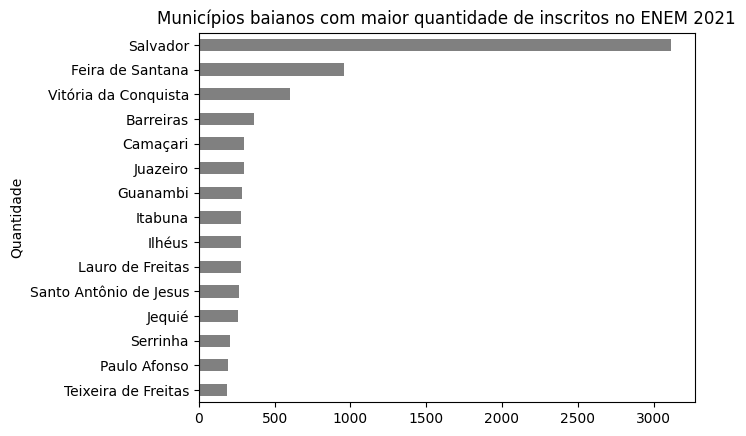

In [65]:
(
    dfba.NO_MUNICIPIO_PROVA
    .value_counts()
    .reset_index()
    .rename(columns={'index': 'Município', 'NO_MUNICIPIO_PROVA': 'Quantidade'})
    .nlargest(n=15, columns='Quantidade')
    .sort_values(by='Quantidade', ascending=True)  # Ordenar em ordem descendente
    .set_index('Município')
    .plot(
        kind='barh',
        color='gray',
        legend=False,
        xlabel='Quantidade',
        title='Municípios baianos com maior quantidade de inscritos no ENEM 2021'
    )
)

In [67]:
dfba.NO_MUNICIPIO_PROVA\
.value_counts()\
.reset_index()

,index,NO_MUNICIPIO_PROVA
0,Salvador,3116
1,Feira de Santana,961
2,Vitória da Conquista,604
3,Barreiras,362
4,Camaçari,299
...,...,...
157,Umburanas,8
158,Riachão das Neves,7
159,Sento Sé,7
160,Jussara,5


#### Com o gráfico de dispersão podemos perceber uma correlação positiva entre a nota de matemática e ciências da natureza, isso pode acontecer por conta da afinidade da matemática com disciplinas como física e quimíca.

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='NU_NOTA_MT', ylabel='NU_NOTA_CN'>

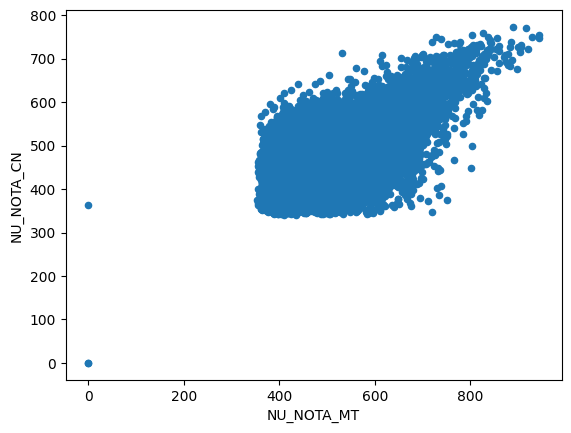

In [86]:
dfba.plot(kind = 'scatter', x = 'NU_NOTA_MT', y = 'NU_NOTA_CN')

#### Com o gráfico de boxplot podemos ver o comportamento da distribuição e os outliers das notas da prova de matemática.

<Axes: >

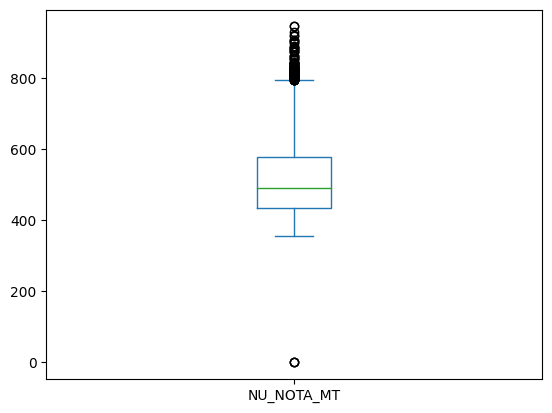

In [87]:
dfba.NU_NOTA_MT.plot(kind = 'box')

#### Vamos melhorar um pouco o boxplot para melhorar a apresentação.

In [ ]:
import seaborn as sns

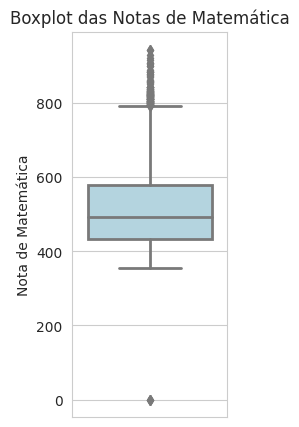

In [105]:
plt.figure(figsize=(2, 5))
sns.set_style("whitegrid")

# Plotando o boxplot das notas de Matemática
ax = sns.boxplot(y=dfba.NU_NOTA_MT, linewidth=2, color='lightblue')

# Adicionando título e rótulos dos eixos
plt.title("Boxplot das Notas de Matemática")
plt.ylabel("Nota de Matemática")
plt.xlabel("")

plt.show()


#### A caixa representa o intervalo interquartil (IQR), que é a diferença entre o 3º quartil (Q3) e o 1º quartil (Q1) dos dados. A linha no meio da caixa representa a mediana, que é o valor que divide o conjunto de dados em duas partes iguais: 50% dos dados estão acima da mediana e 50% estão abaixo. Os bigodes representam a dispersão dos dados fora da caixa. Os whiskers podem ser traçados de diferentes maneiras, sendo a forma mais comum estendendo-se até 1,5 vezes o IQR a partir dos limites da caixa. Os pontos fora da caixa, chamados de "outliers", representam os dados que estão fora do intervalo interquartil e são considerados valores atípicos em relação à distribuição dos dados.

<Axes: >

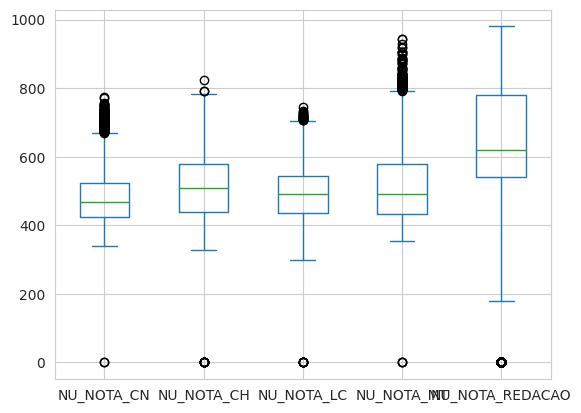

In [109]:
dfba[provas].plot(kind = 'box')

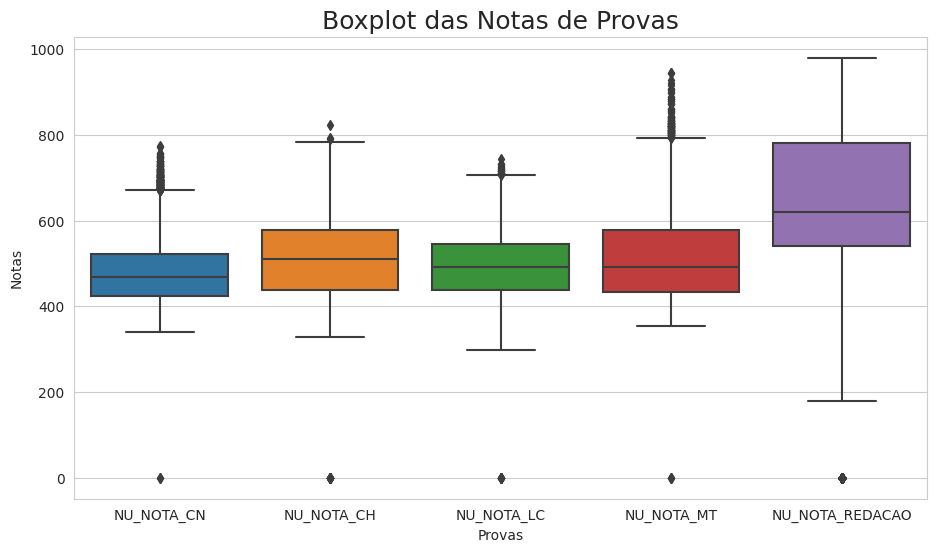

In [112]:


# Configurando o tamanho da figura
plt.figure(figsize=(11, 6))

# Definindo o estilo do grid
sns.set_style("whitegrid")

# Plotando o boxplot vertical das provas
ax = sns.boxplot(data=dfba[provas], orient='v')

# Adicionando título ao gráfico
plt.title("Boxplot das Notas de Provas", loc="center", fontsize=18)
plt.xlabel("Provas")
plt.ylabel("Notas")

plt.show()


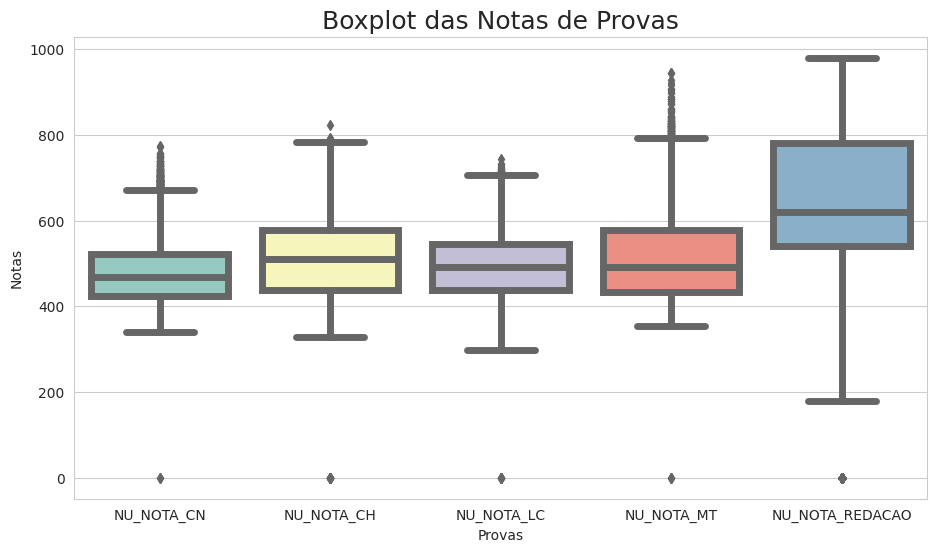

In [116]:
# Tamanho do gráfico em polegadas
plt.figure(figsize=(11, 6))

sns.set_style("whitegrid")

# Plotando o boxplot das notas de provas
ax = sns.boxplot(data=dfba[provas], linewidth=5, palette="Set3")

# Adicionando título e rótulos dos eixos
plt.title("Boxplot das Notas de Provas", loc="center", fontsize=18)
plt.xlabel("Provas")
plt.ylabel("Notas")

plt.show()
